# 化学空間と分子の類似性
化学空間(ケミカルスペース)とは, ケモインフォマティクスにおける概念であり, 理論上成立しうる分子の特性空間のことを指します. つまり, Cの結合数は４とか, そういう分子として記述するためのルールを守りながら理論上可能な分子を考えていき, それら各々の分子の特性 (物理化学的な性質など) を数値的に記述し, 配置したものを化学空間といいます.  
「空間」と聞くと縦・横・高さに広がりのある物理的な広がりを持った空間をイメージしがちですが, ここで用いられている空間の意味は, 数学で用いる空間に近いです. 
> **補足**  
> 数学でいう「空間」を厳密に説明することは難しいので (数学特有の記述方法が必要になってしまうので) 詳細な説明は省きますが, ざっくりと, ここでいう空間とは$n$次元の実数ベクトルが定められる設定だと思っていたいて大丈夫です(ケモインフォではほとんどn次元実数ベクトルしか扱わないのでここまで言い切ってしまっています). 実数ベクトルとは, 高校数学で習ったようなベクトルのことを指します. 例えば,
> $$a = (1, 2)^T$$
> というような実数ベクトルがあった場合, このベクトルが記述されている空間は2次元実数空間といい, $a$ が2次元実数空間に属することを $a \in \mathbb{R}^2$ と書きます. また, 補足ですが, $N \times M$行列$A$が記述できる実数空間があった場合, $A \in \mathbb{R}^{N \times M}$ のように書きます.

つまり, ケミカルスペースとは化合物を何らかの尺度で$n$次元の空間に配置したものです. ここでよく用いられる尺度には, うまく化合物の特徴を表すような「距離」が定義されるように決められることが多いです. より具体的には, いろんな化合物に対して$n$次元のフィンガープリントを取得した場合, その化合物が表現されるケミカルスペースは$n$次元実数空間です. そして, そのフィンガープリントの$n$次元ベクトルによっていろんな分子が数値的に配置されたものをケミカルスペースと言います. また, 潜在的な薬理活性分子の空間の大きさは$10^{60}$分子のオーダーと推定されています.

# 実装1. ケミカルスペースを可視化する

ライブラリのインポート

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from mordred import descriptors, Calculator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

rdkitのサンプルデータを使います.

In [14]:
df = pd.read_csv('water_solubility.csv').drop(175)
smiles = df['SMILES'].tolist()
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
logS = np.array(df['logS'])

各分子の特性を記述するために, mordred記述子を算出します.

In [18]:
def calc_mordred(mols, ignore_3D):
    global calc
    if ignore_3D:
        calc = Calculator(descriptors, ignore_3D=True)
    else:
        calc = Calculator(descriptors)
    # calculate descriptors
    df_mord = calc.pandas(mols)
    df_mord = df_mord.astype(str)
    masks = df_mord.apply(
        lambda d: d.str.contains('[a-zA-Z]', na=False))
    df_mord = df_mord[~masks]
    df_mord = df_mord.astype(float)
    return df_mord

In [19]:
df_mord = calc_mordred(mols, True)

100%|██████████| 1289/1289 [03:18<00:00,  6.50it/s]


可視化のための前処理をしていきます. とりあえず欠損がある列は全て削除します.

In [26]:
df_mold_prcessed = df_mord.dropna(axis=1)
df_mold_prcessed

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.037114,6.559679,9.0,0.0,12.0,9.0,3.111111,1.000000
1,1.414214,1.414214,0.0,0.0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,4.174387,17.310771,46.053098,5.117011,4.0,0.0,6.0,4.0,2.250000,1.000000
2,2.449490,2.449490,1.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,60.021129,7.502641,9.0,0.0,12.0,9.0,3.111111,1.000000
3,3.535534,3.535534,0.0,1.0,6.472136,2.000000,3.618034,6.472136,1.294427,2.525424,...,7.147559,41.004802,71.073499,5.076679,15.0,0.0,20.0,20.0,1.250000,1.250000
4,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,13.808287,12.526035,0.0,0.0,22.612075,2.467255,4.934511,22.612075,1.256226,3.814497,...,9.969228,51.484360,357.844416,16.265655,537.0,32.0,94.0,113.0,7.888889,3.944444
1285,18.142136,12.647424,0.0,0.0,30.880509,2.521172,5.042344,30.880509,1.403660,4.078091,...,10.346024,57.149063,278.109550,7.725265,971.0,41.0,128.0,158.0,4.388889,4.666667
1286,18.687482,12.675910,0.0,0.0,31.425065,2.638574,5.277147,31.425065,1.428412,4.111337,...,10.634532,57.909470,276.093900,8.120409,815.0,49.0,138.0,178.0,4.111111,4.527778
1287,16.096016,14.757082,0.0,0.0,25.965456,2.507908,5.015816,25.965456,1.236450,3.967909,...,10.241566,55.541342,459.727499,20.896705,820.0,42.0,112.0,138.0,10.472222,4.555556


行の値が全て定数である列は削除します

In [54]:
# まず列ごとに分散を計算します.
vars = df_mold_prcessed.var(axis=0)

# 分散0でない列のbool値を取得する.
mask = (vars != 0).values

# 分散が0でない列だけ抜き出す
X = np.array(df_mold_prcessed)[:,mask]
print(X.shape)

(1289, 823)


823次元になりました. これを主成分分析(PCA)という次元圧縮手法を用いて２次元に圧縮し, ケミカルスペースを散布図で可視化してみます.

In [55]:
# PCAにかける前に変数を標準化する
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

散布図を作成します.

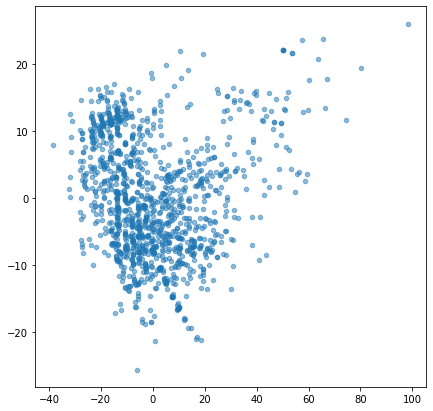

In [56]:
plt.figure(figsize=(7,7))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    s=20,
    alpha=0.5
     )
plt.show()

これだけだと分からないので, logSの値に応じて散布図に色をつけてみましょう

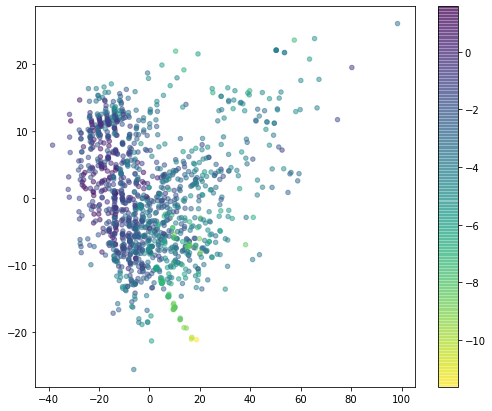

In [64]:
plt.figure(figsize=(8.5,7))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    s=20,
    alpha=0.5,
    c=logS,
    cmap=plt.cm.get_cmap('viridis_r')
     )
plt.colorbar()
plt.show()

こうやってみると, 下の方は溶解度が低く, 左側には溶解度が高いものが密集している傾向がわかります. このように, ケミカルスペースを可視化することで, 目的の物性が化学空間上にどのように分布しているかがわかります. 目的の物性を高めたい時に, このケミカルスペース上のどの位置にプロットが打てるような分子を設計すれば良いのか指針を立てることができます. 似た構造を持つ分子は似た特性値を持つはずですから, ケミカルスペース上で近い位置にプロットされます. しかし, 全てが例外なく似た分子が似た活性を有するわけでなく, １つの官能基の違いだけで飛躍的に活性が変わる **活性の崖(Activity Cliff)** があることに注意が必要です.

# 実装２. Morganフィンガープリントで分子の類似性を評価する
フィンガープリントをもとにした分子の類似性評価の方法として, 「Tanimoto係数」と呼ばれるものがあります.　Tanimoto係数の考え方では, 分子間で共通する部分構造の割合をフィンガープリントに基づいて算出することで, 分子の類似性を数値化します. 具体的にはTanimoto係数は以下の式で計算されます.  
$$c_{Tanimoto}(A,B) = \frac{n (A \cap B)}{n (A \cup B)}$$
ここで, $n (A \cup B)$ は分子$A$と分子$B$の有する部分構造の総数, $n (A \cap B)$ は, 分子$A$と分子$B$で共通する部分構造の総数です. どんな部分構造を使うかはフィンガープリントの算出アルゴリズムによって異なりますので, 一口にTanimoto係数と言っても, どんなフィンガープリントに基づいて算出されえたTanimoto係数であるかに注意する必要があります.  
では, 早速実装していきましょう.

まず, 必要なライブラリをインポートします. Mordredによるケミカルスペース可視化で使ったライブラリは既にインポートされているものとします.

In [66]:
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw

MolオブジェクトをもとにMorganフィンガープリントを取得します. Tanimoto係数を算出する場合は,  Chapter3で行ったような, フィンガープリントをベクトルとして取得する```AllChem.GetMorganFingerprintAsBitVect```とは異なる```AllChem.GetMorganFingerprint```という関数を使っていきますので注意が必要です.

In [75]:
# radius = 2で Morgan fingerprintを取得する
fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in mols]

Tanimoto similarity matrixを作る. データセット内の化合物の全ペアについてTanimoto係数を算出して化合物数×化合物数の行列として保存します.

In [76]:
Tanimoto_Similarities = np.zeros([len(mols), len(mols)]) # ここで化合物数×化合物数の要素が全て０の行列を作る.
# 二重ループで行方向, 列方向の各ペアについてTanimoto係数を算出する.
for i, fp1 in enumerate(fps):
    for j, fp2 in enumerate(fps):
        tanimoto_similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        Tanimoto_Similarities[i,j] = tanimoto_similarity

Tanimoto係数の分布を見てみましょう

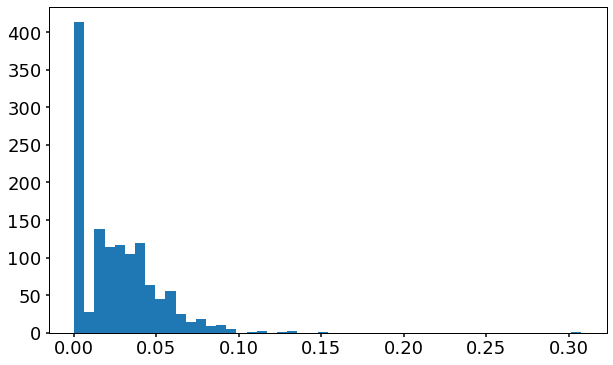

In [98]:
tanimoto_unique = []
for i in range(len(fps)):
    if i == 1:
        tanimoto_unique.append(Tanimoto_Similarities[i, i+1:]) # similarity行列の上半分(の三角形)だけ取得します. #i==jの成分は無視されます.
tanimoto_unique = np.concatenate(tanimoto_unique, axis=0) # 結果を全て結合して並べます

# 度数分布の描写
plt.figure(figsize=(10,6))
plt.hist(tanimoto_unique, bins=50)
plt.show()

Tanimoto係数の類似性行列をカラーマップにして可視化します.

<ipython-input-78-74dc248d07da>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_mesh, y_mesh, z_mesh)


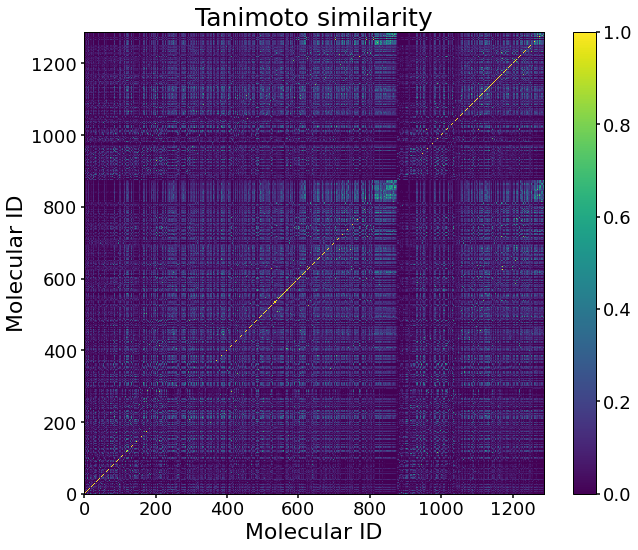

In [78]:
x = np.arange(len(mols))
y = np.arange(len(mols))
x_mesh, y_mesh = np.meshgrid(x, y)
z_mesh = Tanimoto_Similarities

plt.rcParams['xtick.direction'] = 'out'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'out'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.5#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.5#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 18 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1# 軸の線幅edge linewidth。囲みの太さ

fig = plt.figure(figsize=(10.3, 8.5))
plt.title('Tanimoto similarity', fontsize=25)
plt.xlabel('Molecular ID', fontsize=22)
plt.ylabel('Molecular ID', fontsize=22)
plt.pcolormesh(x_mesh, y_mesh, z_mesh)
plt.colorbar()

plt.show()

これで決定的な何かがわかるというわけではありませんが, カラーマップや度数分布を見ればデータセットが全体的にどの程度似通った分子の集団なのかを定量的に議論することができます. 2つ以上のデータセットを比較するなどに使っても良いかもしれません. 用途は無限に考えられますが, 深入りはしません. 興味のある方は論文などを読んでみてください.